In [3]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


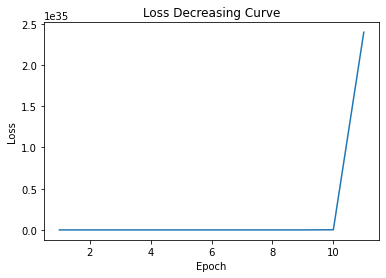

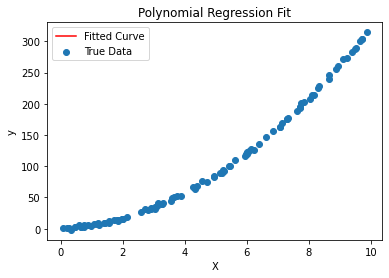

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(42)  # 设置随机种子以便结果可重复
X = np.sort(np.random.rand(100, 1) * 10, axis=0)  # 生成0到10之间的100个随机数，并排序
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 2  # 生成多项式关系的目标变量，并添加一些噪声

# 将数据转换为PyTorch张量
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 定义多项式回归模型（这里我们假设是二次多项式）
class PolynomialRegressionModel(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegressionModel, self).__init__()
        self.degree = degree
        self.linear = nn.Linear(degree + 1, 1)  # 因为多项式项从0次到degree次，所以总共有degree+1个系数

    def forward(self, x):
        # 创建多项式特征，例如对于二次多项式，我们需要 [x^0, x^1, x^2]
        polynomial_features = [x**i for i in range(self.degree + 1)]  # 生成多项式特征
        polynomial_features = torch.cat(polynomial_features, dim=1)  # 将列表拼接成一个张量
        return self.linear(polynomial_features)

# 初始化模型、损失函数和优化器
degree = 2  # 设置多项式的次数
model = PolynomialRegressionModel(degree)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
losses = []  # 用于记录每个epoch的损失

for epoch in range(num_epochs):
    model.train()

    # 前向传播
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录损失
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# 绘制损失下降曲线
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Decreasing Curve')
plt.show()

# 可视化训练后的模型（在真实数据上）
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # 生成用于绘图的x值
X_plot_tensor = torch.tensor(X_plot, dtype=torch.float32)
with torch.no_grad():  # 禁止梯度计算以加速推理
    y_plot = model(X_plot_tensor).numpy()  # 获取模型预测值

plt.scatter(X, y, label='True Data')  # 绘制真实数据点
plt.plot(X_plot, y_plot, label='Fitted Curve', color='red')  # 绘制拟合曲线
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()